In [2]:
from pathlib import Path
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import CountEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.pipeline import Pipeline
#from sklearn.preprocessing import TargetEncoder
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix

from sklearn.metrics import classification_report
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [36]:
train_date = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/train.csv')
test_date = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/test.csv')
sub_df = pd.read_csv('C:/Users/wgkdj/smbc_comp/input/sample_submission.csv',header=None)
sub_df.columns = ["index", "health"]

In [20]:
train_date['int_steward'] = train_date['steward'].replace({'1or2': 1, '3or4': 2, '4orMore': 3})

In [37]:
train_date.isnull().sum()

Unnamed: 0        0
created_at        0
tree_dbh          0
curb_loc          0
health            0
steward       14883
guards        14943
sidewalk          0
user_type         0
problems      12243
spc_common        0
spc_latin         0
nta               0
nta_name          0
borocode          0
boro_ct           0
boroname          0
zip_city          0
cb_num            0
st_senate         0
st_assem          0
cncldist          0
dtype: int64

In [31]:
train_date['steward'].fillna('Unknown', inplace=True)

<Axes: xlabel='steward', ylabel='count'>

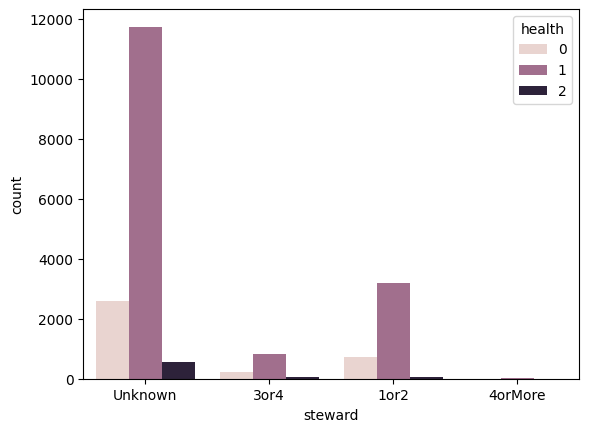

In [33]:
#f,axes = plt.subplots(ncols=1, figsize=(25,10))
sns.countplot(x='steward',hue='health',data=train_date)
